In [6]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [7]:

sys.path.append("../")



In [8]:


from dd_package.data.dyslexia_data import DyslexiaData



In [9]:
dd = DyslexiaData(
    n_splits=1,
    n_repeats=2,
    path="../../datasets/"

    )


# Load data

In [11]:

# data_sets_xls = pd.ExcelFile("../data/Old data/demo_dub_sbj.xlsx")

data_sets_xls = pd.ExcelFile("../../datasets/Fix_Demo_test_data_2.xlsx")
                   
print(data_sets_xls.sheet_names)




['demography_test_2', 'fixations_test_2']


In [12]:


print("Loading Fixation data ")
tmp = pd.read_excel(data_sets_xls, 'fixations_test_2',)
tmp = dd._remove_missing_data(df=tmp)



Loading Fixation data 


In [13]:
tmp.replace(
    to_replace={"Sex": {"fem": 1, "f": 1, "masc": 2, "m": 2}},
    inplace=True,
)



In [14]:


tmp.astype({
    "SubjectID": str,
    "Sentence_ID": int,
    "Word_Number": int,
    "FIX_X": float,
    "FIX_Y": float,
    "FIX_DURATION": float,
})



,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,nnr2,6,1,163.0,513.2,250.0
1,nnr2,6,1,210.7,507.1,158.0
2,nnr2,6,2,277.1,509.1,366.0
3,nnr2,6,3,337.7,501.6,154.0
4,nnr2,6,3,372.4,505.8,372.0
...,...,...,...,...,...,...
17251,nnr91,17,6,993.5,511.5,390.0
17252,nnr91,17,7,1121.7,502.0,251.0
17253,nnr91,17,7,1100.9,506.2,221.0
17254,nnr91,17,7,1167.5,500.6,227.0


In [18]:


data_set = tmp.sort_values(by=["SubjectID", "Sentence_ID"]).dropna()

print(" ", tmp.shape)
print(" ")






  (17256, 6)
 


In [19]:


data_set


,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
817,nnr10,4,1,148.1,513.9,293
818,nnr10,4,2,187.6,527.7,275
819,nnr10,4,1,158.6,526.2,188
820,nnr10,4,3,296.9,533.1,144
821,nnr10,4,3,276.5,534.4,184
...,...,...,...,...,...,...
16636,nnr91,33,4,541.9,503.0,254
16637,nnr91,33,4,520.2,498.2,191
16638,nnr91,33,4,668.9,480.7,206
16639,nnr91,33,6,969.0,492.4,226


In [20]:

data_set.columns



Index(['SubjectID', 'Sentence_ID', 'Word_Number', 'FIX_X', 'FIX_Y',
       'FIX_DURATION'],
      dtype='object')

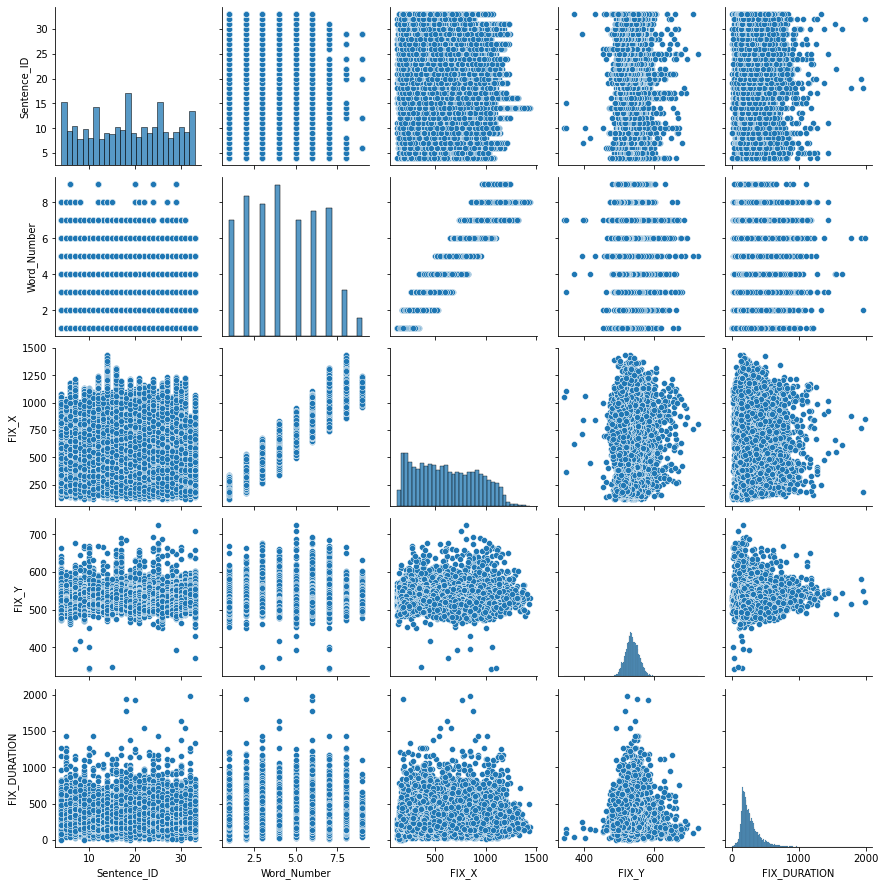

In [21]:

sns.pairplot(data=data_set)
plt.show()
    
    


In [22]:


to_exclude_at_risk = 0
# dict of dicts, s.t each dict contains pd.df of a class, e.g normal
_ = dd.get_fix_datasets()  # fixes
# concatenate pd.dfs to a pd.df
fix = dd.concat_classes_fix()

# The optimize way to exclude at-risk class
if to_exclude_at_risk == 1:
    to_exclude_at_risk = True
    fix = fix.loc[fix.Group != 2]

df_data_to_use = fix
c_features = None
indicators = [
    'SubjectID', 'Sentence_ID', 'Word_Number',
]

targets = ["Group", ]



Loading Fixation report data:
  dyslexia (59770, 7)
  norm (139507, 7)
  risk (26073, 7)
 


In [23]:




pr_fix = df_data_to_use.values
cols = df_data_to_use.columns

fix_pr = pd.DataFrame(data=pr_fix, columns=cols)


fix_pr
    
    

,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,1,10,4,1,177.3,531.8,219.0
1,1,10,4,2,200.5,545.2,247.0
2,1,10,4,3,282.7,542.4,261.0
3,1,10,4,4,358.1,545.5,268.0
4,1,10,4,4,392.8,536.3,129.0
...,...,...,...,...,...,...,...
225345,3,zrs09,33,5,743.3,562.7,160.0
225346,3,zrs09,33,5,772.5,555.8,193.0
225347,3,zrs09,33,5,941.7,561.9,219.0
225348,3,zrs09,33,5,831.8,548.8,144.0


In [24]:


fix_pr_ = fix_pr.iloc[:, 1:]

fix_pr_.head()


,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
0,10,4,1,177.3,531.8,219.0
1,10,4,2,200.5,545.2,247.0
2,10,4,3,282.7,542.4,261.0
3,10,4,4,358.1,545.5,268.0
4,10,4,4,392.8,536.3,129.0


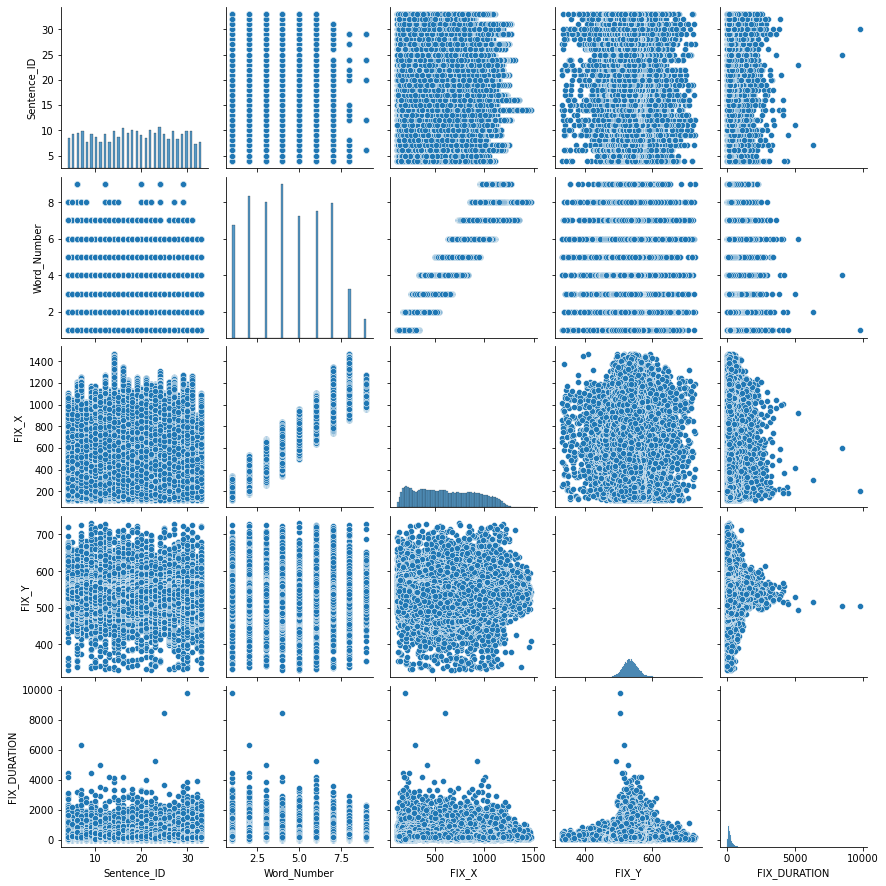

In [25]:

# Prvisious data pairplots:
sns.pairplot(data=fix_pr_)
plt.show()



In [26]:


def plot_hists(datasets, col,):
    
    colors = ["r", "y", "g"]
    fig = plt.figure(figsize=(20, 9))
    ctr = 1
    for d in range(len(datasets)): 
        data = datasets[d]
        
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = data[col].values
        bins = np.linspace(x.min(), x.max(), 40)
        ax.hist(x=x, bins=bins, color=colors[ctr])
        if d == 0:
            t = "New Test data"
        if d ==1:
            t = "Previous data"
            
        ax.set_title(t, fontsize=16)
        ctr += 1

    fig.suptitle("Distributions of " + col, fontsize=19)
    plt.show()
    
    return None



In [31]:
for data in (data_set, fix_pr_):
    print(data.shape)

(17256, 6)
(225350, 6)


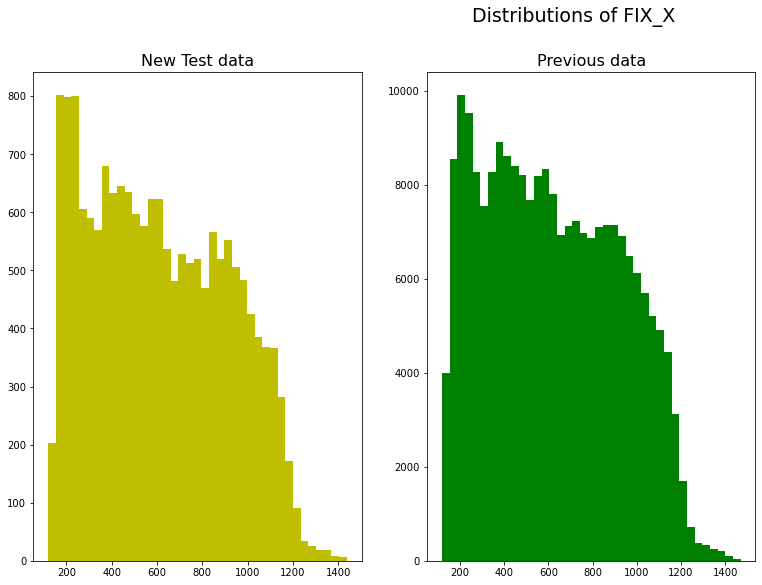

In [28]:

plot_hists(datasets=(data_set, fix_pr), col="FIX_X",)



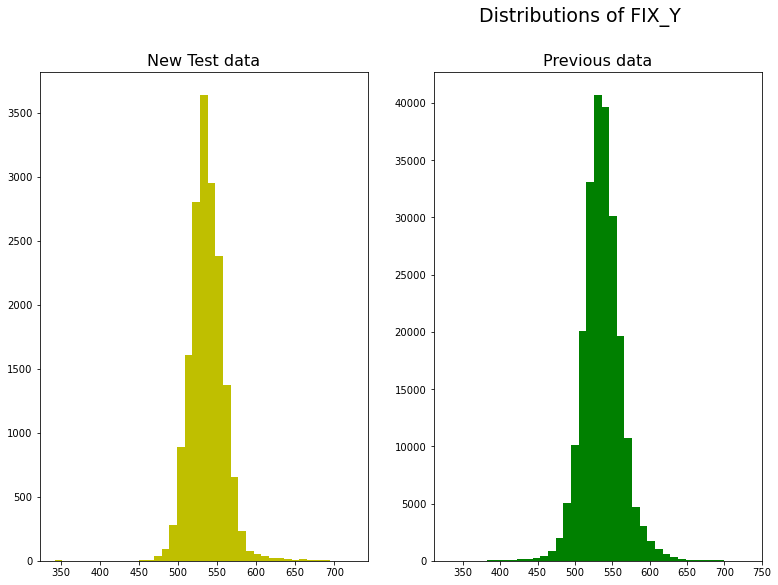

In [29]:


plot_hists(datasets=(data_set, fix_pr), col="FIX_Y",)



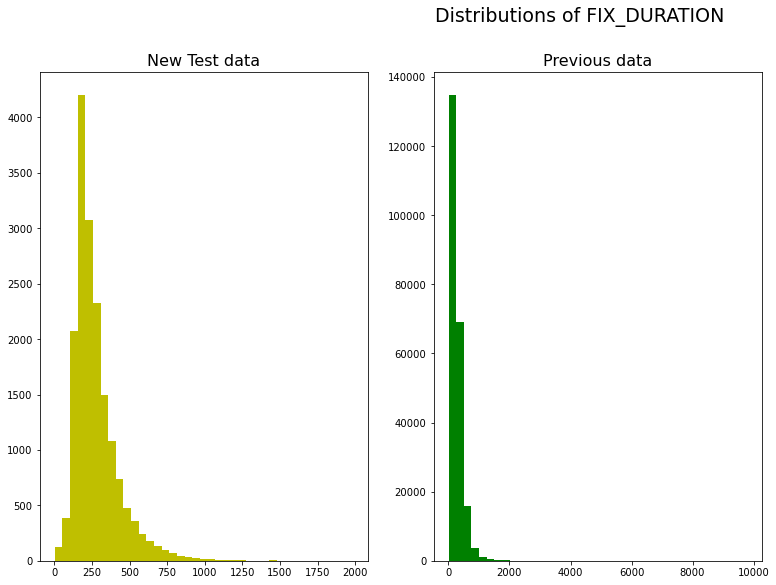

In [32]:

plot_hists(datasets=(data_set, fix_pr), col="FIX_DURATION",)




## 

In [57]:


features = ['Word_Number', 'FIX_X', 'FIX_Y', 'FIX_DURATION']



for f in features:
    print(
        f"{f}: "
        f" \t Train Mean: {fix_pr.loc[:, f].mean(): .3f} ± {fix_pr.loc[:, f].std(): .3f} "
        f",\t Test Mean: {data_set.loc[:, f].mean(): .3f} ± {data_set.loc[:, f].std(): .3f} \n "
        f" \t \t Train Rng: {fix_pr.loc[:, f].min(): .3f} - {fix_pr.loc[:, f].max(): .3f} "
        f", \t Test Rng: {data_set.loc[:, f].min(): .3f} - {data_set.loc[:, f].max(): .3f} \n "
    )



Word_Number:  	 Train Mean:  4.312 ±  2.173 ,	 Test Mean:  4.264 ±  2.175 
  	 	 Train Rng:  1.000 -  9.000 , 	 Test Rng:  1.000 -  9.000 
 
FIX_X:  	 Train Mean:  620.267 ±  301.588 ,	 Test Mean:  611.256 ±  300.155 
  	 	 Train Rng:  119.000 -  1469.100 , 	 Test Rng:  120.000 -  1437.300 
 
FIX_Y:  	 Train Mean:  536.246 ±  26.119 ,	 Test Mean:  537.122 ±  21.890 
  	 	 Train Rng:  330.700 -  730.200 , 	 Test Rng:  342.300 -  723.800 
 
FIX_DURATION:  	 Train Mean:  266.312 ±  203.047 ,	 Test Mean:  274.048 ±  154.189 
  	 	 Train Rng:  1.000 -  9780.000 , 	 Test Rng:  1.000 -  1986.000 
 
